In [1]:
from IPython.display import Image
from CalcLigRMSD import *

# CalcLigRMSD

CalcLigRMSD calculates the Root-mean-square deviation (RMSD) between two prealigned molecules. 

This jupyter notebook shows examples of how to use the CalcLigRMSD function. 
This function is particularly useful in 2 cases:

1. when the atom names in the compared structures do not match, i.e. when the same atoms present different names in the coordinate files. 
2. when one or both structures have missing atoms. This occurs, for example, in crystallographic structures when some atoms are not well defined in the electron density map.

Below, there are also examples of how to align protein structures and extract ligand coordinates using a python/pymol function. The code below may be used both when the protein structures have multiple chains/domains and when protein structures present multiple copies of the ligand of interest, either in the binding pocket or on the surface.

#### How to use the CalcLigRMSD function:

In [2]:
help(CalcLigRMSD)

Help on function CalcLigRMSD in module CalcLigRMSD:

CalcLigRMSD(lig1, lig2, rename_lig2=True, output_filename='tmp.pdb')
    Calculate the Root-mean-square deviation (RMSD) between two prealigned ligands, 
    even when atom names between the two ligands are not matching.
    The symmetry of the molecules is taken into consideration (e.g. tri-methyl groups). 
    Moreover, if one ligand structure has missing atoms (e.g. undefined electron density in the crystal structure), 
    the RMSD is calculated for the maximum common substructure (MCS).
    
    Parameters
    ----------
    lig1 : RDKit molecule
    lig2 : RDKit molecule
    rename_lig2 : bool, optional
        True to rename the atoms of lig2 according to the atom names of lig1
    output_filename : str, optional
        If rename_lig2 is set to True, a PDB file with the renamed lig2 atoms is written as output.
        This may be useful to check that the RMSD has been "properly" calculated, 
        i.e. that the atoms have b

# RMSD between Pre-aligned Ligands with not Matching Atom Names 

## Basic Example

#### Complex between the kinase protein AURKA and the JVE ligand

Comparison between the crystal structure of JVE (pink, PDB code: 4UZH) and the docked pose of JVE (yellow).
JVE was docked into the the AURKA structure 2C6E using AutodockVina. 

In [3]:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile("data/docked_2c6e_JVE_pH74_netcharge1.pdb")
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/4uzh_JVE.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/JVE_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")



RMSD: 1.66


The atom names in the docked structure and in the crystal structure are different. However, the function is able to match the atoms and calculate the RMSD.

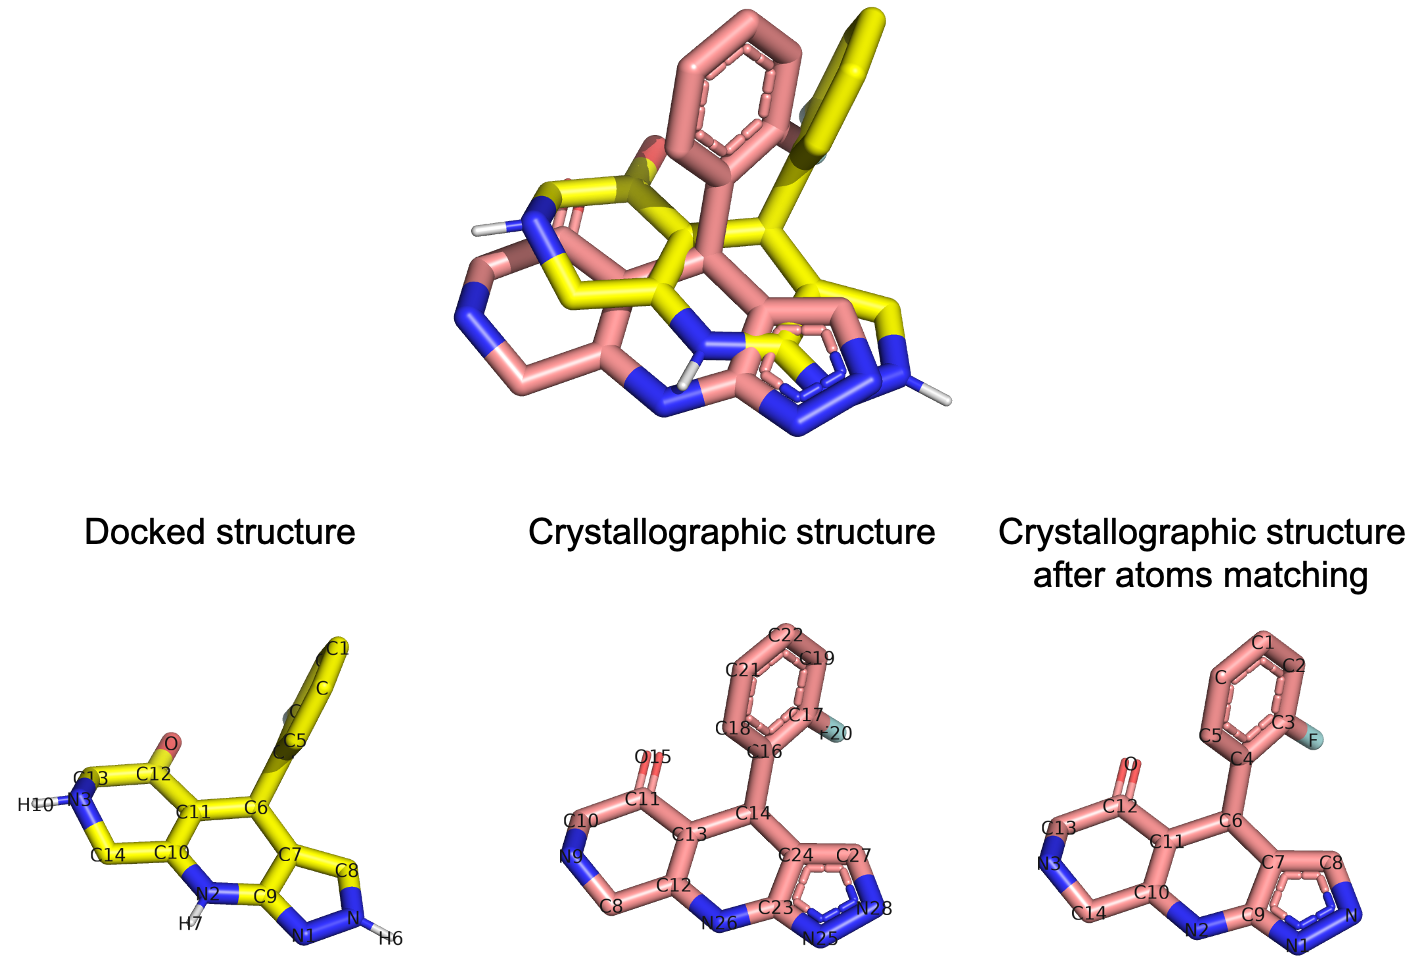

In [4]:
Image("./figures/JVE.png", width=600)

## Examples were symmetry needs to be considered

#### Complex between the kinase protein AURKA and the N15 ligand

In [5]:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile("data/docked_2c6e_N15_pH74_netcharge1.pdb")
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/3w2c_N15.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/N15_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")



RMSD: 1.49


The N15 ligand contains two symmetric groups (highlighted in the Figure below). The algorithm takes symmetry into consideration: it calculates the RMSD between all possible "symmetrical" combinations and returns the minimum RMSD. The structures with matched atom names corresponding to the lowest RMSD are reported in the figure below.

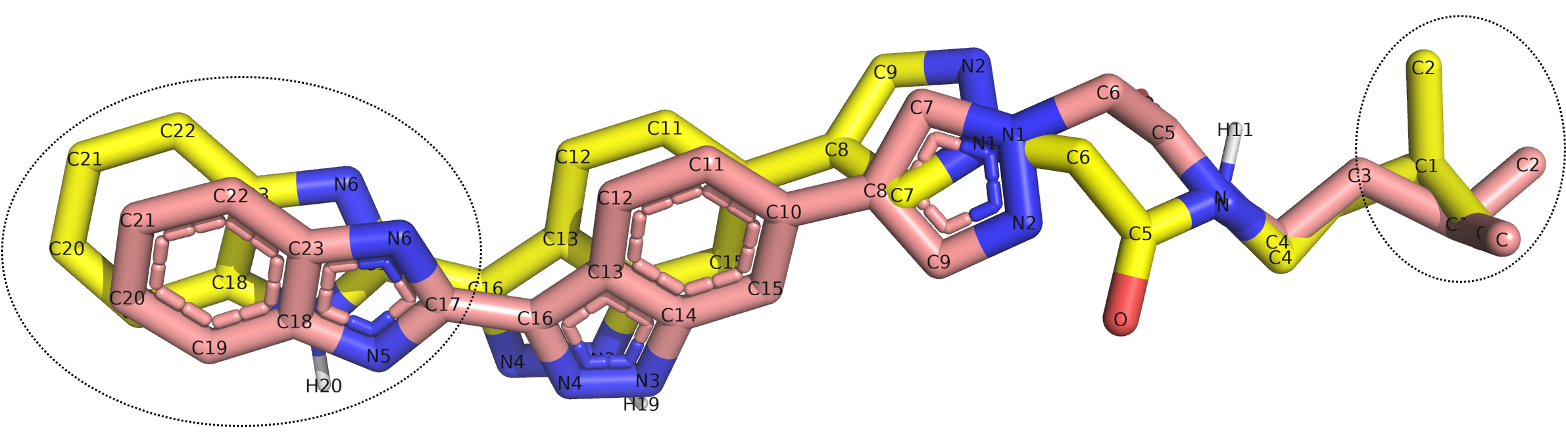

In [6]:
Image("./figures/N15.png", width=800)

#### Complex between the kinase protein AURKA and the AKI ligand

In [7]:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile("data/docked_2c6e_AKI_pH74_netcharge1.pdb")
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/3m11_AKI.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/AKI_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")


RMSD: 4.55


The AKI ligand contains four symmetric groups (highlighted in the Figure below). Again, the code takes symmetry into consideration!

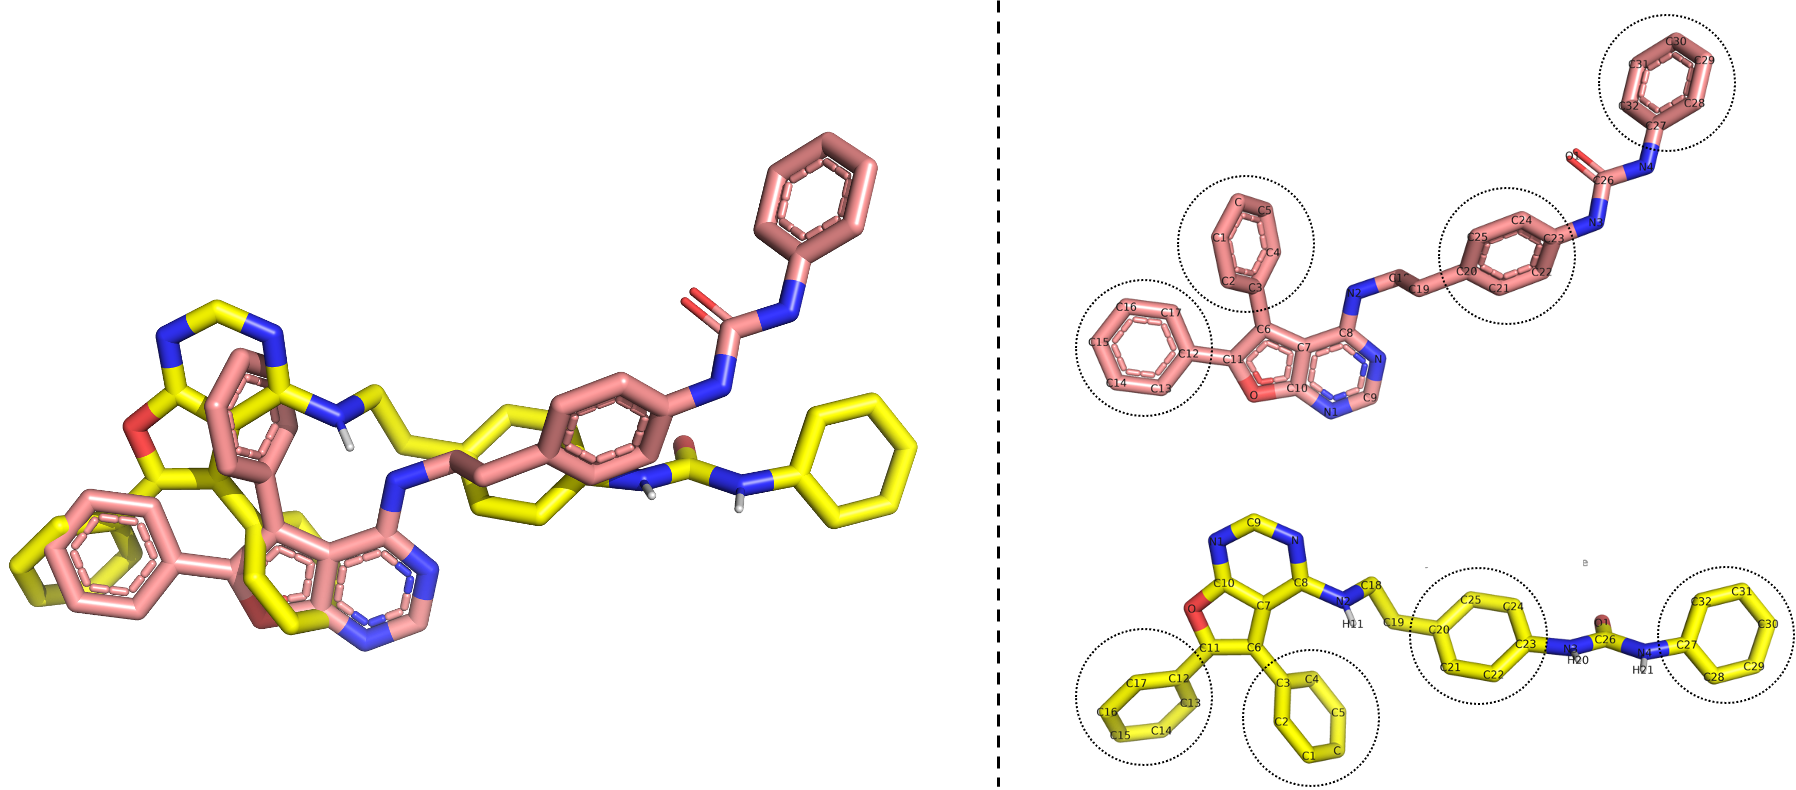

In [8]:
Image("./figures/AKI.png", width=800)

### Example for a very symmetrical molecule

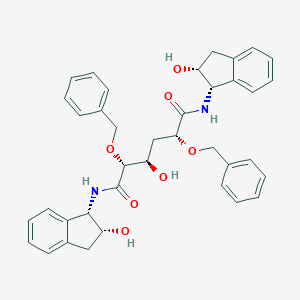

In [9]:
Image("./figures/BEG.png", width=300)

BEG is a very symmetrical molecule (see [this ref](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-019-0362-7)). Not only it contains two benzene groups but the entire molecule is symmetrical. We have downloaded the crystal structure 1D4I and extracted the coordinates of the BEG molecule (1d4i_BEG.pdb). In a copy (BEG_test.pdb), we have then renamed the atoms randomly. If the alghoritm is able to correctly match the atoms, then it will return an RMSD of zero. And indeed:

In [10]:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile("data/BEG_test.pdb")
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/1d4i_BEG.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = False, output_filename = 'data/AKI_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")


RMSD: 0.00


## Example were there are missing atoms in the crystal structure

Two crystal structures are available for the EGFR/1C9 complex. However, the electron density of the 1C9 is not well defined in any of the structures (see figure below). In such cases, one can calculate the RMSD between the docked and crystal structures by excluding the atoms which are not defined in the crystal structure.

This is achived by calculating the RMSD for the maximum common substructure.

In [11]:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile("data/docked_3w2p_1C9_pH74_netcharge1.pdb")
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/4i23_1C9.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/1C9_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")




RMSD: 6.47


In [12]:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile("data/docked_3w2p_1C9_pH74_netcharge1.pdb")
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/4i24_1C9.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/1C9_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")


RMSD: 7.71


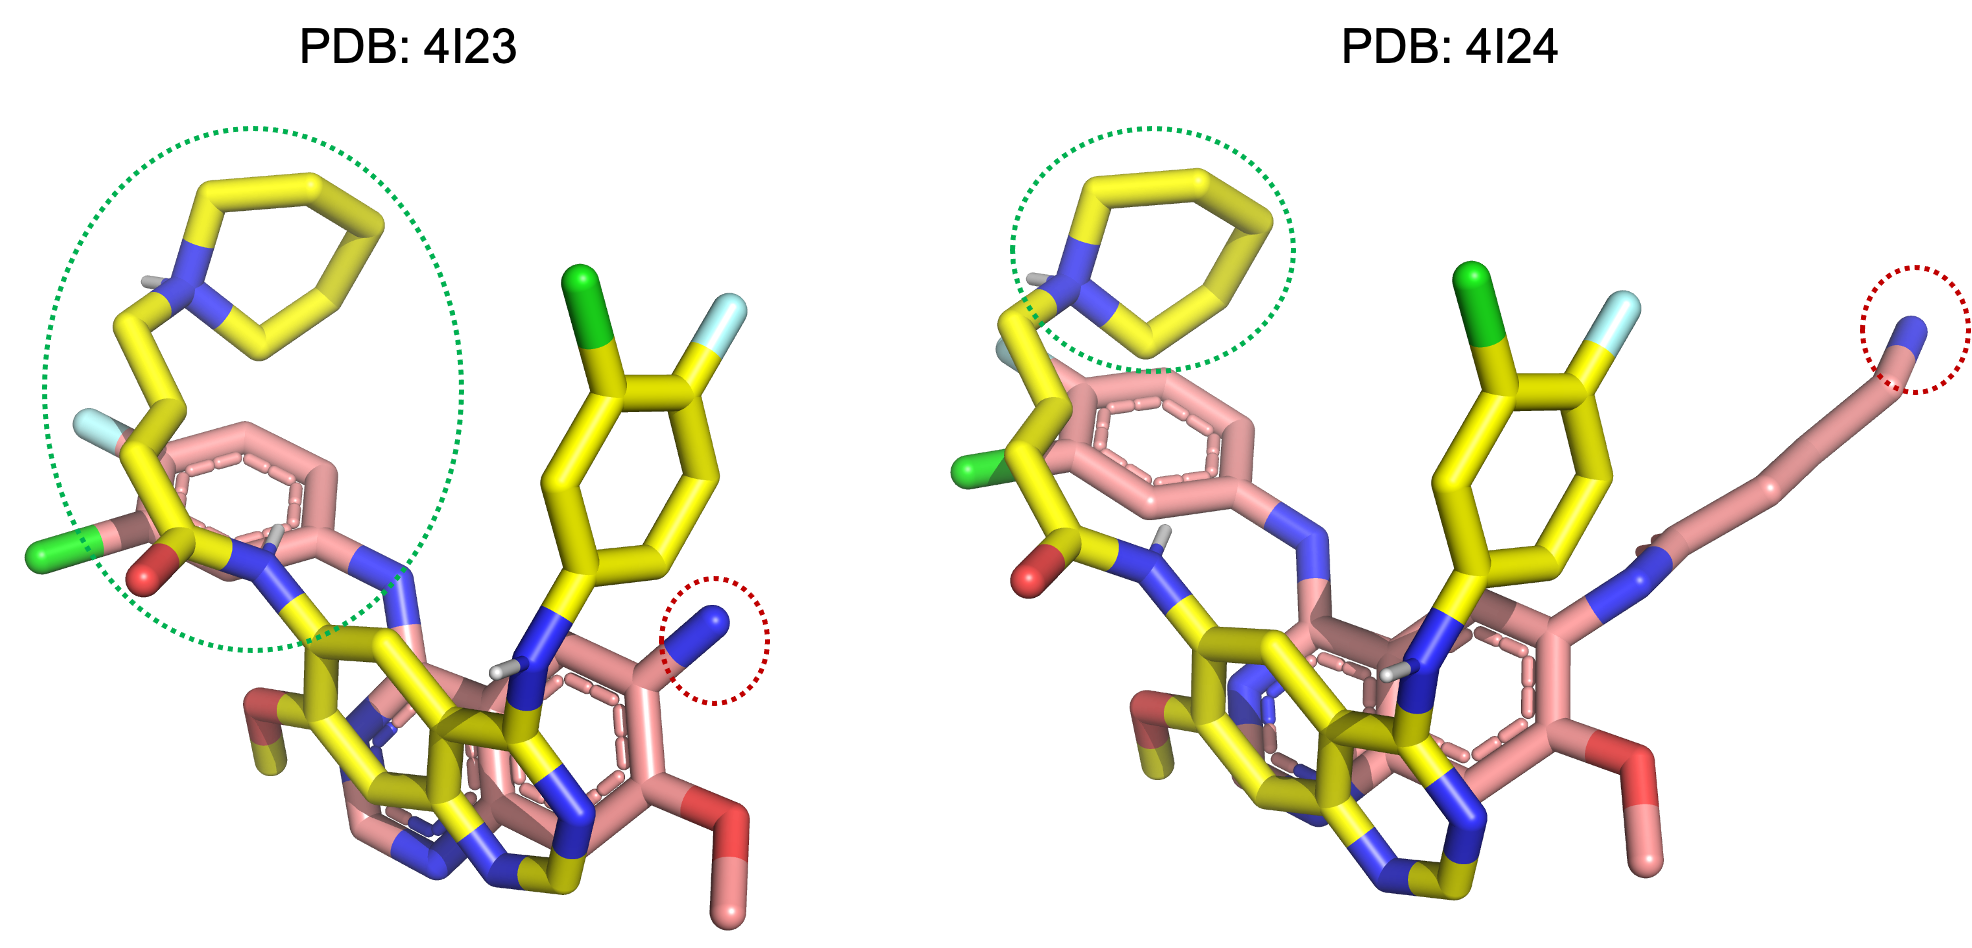

In [13]:
Image("./figures/1C9.png", width=800)

In this figure, the missing groups are highlighted in green in the docked pose while the truncation point in the crystal structure is highlighted in red.

# Align docking and crystal structures prior to the RMSD calculation

The function above takes as input pre-aligned ligand structures. In this section, we show how one could align crystallographic protein-ligand structure to the docked structure and extract the ligand coordinates from the crystal structure using Pymol. 

In [14]:
from pymol import cmd

## 1. Load the crystallographic and docked protein-ligand structures in pymol

Docking programs often return as output only the coordinates of the docked ligand.
Therefore, in order to be able to perform the protein alignment,
we first need to load both the protein structure used for docking and the docked ligand structure in pymol
and merge the coordinates in a temporary PDB file, complex.pdb


Input files:
- `docked_lig_file` : name of file containing the coordinates of the docked ligand
- `protein_file` : name of file containing the the protein structure used for docking
- `crystal_file`: name of file containing the crystal structure of the complex

In [15]:
# Function to merge the ligand and protein PDB files in a unique PDB file 
def merge_prot_lig_pdbs(protein_file, docked_lig_file, output_file = 'complex.pdb'):
    cmd.reinitialize()
    cmd.load(protein_file, 'protein')
    cmd.load(docked_lig_file, 'docked_lig')
    cmd.save(output_file, "protein or docked_lig")
    


In [16]:
docked_lig_file = "data/docked_2c6e_SKE_pH74_netcharge1.pdb"
protein_file = "data/aurka_protein_2c6e.pdb"
crystal_file = "data/5dt0.pdb"

merge_prot_lig_pdbs(protein_file, docked_lig_file)

 PyMOL not running, entering library mode (experimental)


Now we can reinitialize Pymol and load both the docked and crystal complexes in Pymol. The step above can be skipped if the docked complex is directly available.

In [17]:
# load both the docked and crystallographic protein-ligand structures 
cmd.reinitialize()
cmd.load("complex.pdb", "docked")
cmd.load(crystal_file, "crystal")

## 2. Proteins Alignment

### Simple Example

Align the proteins on the backbone alpha carbons and extract the coordinates of the ligand from the crystal structure:



In [18]:
# align the protein structures on the CA 
cmd.align("crystal and name CA", "docked and name CA")

# save the coordinates of the ligand in a PDB file
cmd.save("data/lig_crystal_aligned.pdb", "crystal and resn SKE")


Now, you can calculate the RMSD:

In [19]:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile(docked_lig_file)
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/lig_crystal_aligned.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/1C9_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")


RMSD: 8.21


### Alignment for Structures with Multiple Chains/Domains and Different/Multiple Ligands

The structure alignment and ligand extraction becomes more complicated for crystal structures that contain dimers, or higher oligomers, multi-protein complexes, multiple and different ligands!
In these case, the code below can be used. It reads as input the crystallographic and docked structures.
The function does the following:

   - check for the presence of organic molecules in the crystal structure.
   - check for the presence of organic molecules in each of the chains
   - if a chain contains an organic molecule, then that chain is aligned to the docked structure based on the C-alpha backbone atoms.
   - calculate the distance between the organic molecule in the aligned crystal structure and the organic molecule in the aligned docked structure.
   - if the distance is lower than a  given threshold (max_dist), the coordinates of the organic molecule from the aligned crystal structure are stored in a PDB file.


In [20]:
from pymol import stored
import numpy as np 

def find_organic_ligs(obj_name):
    cmd.select(f"ligs", f"{obj_name} and organic")
    stored.residues = set()
    cmd.iterate(f"ligs", 'stored.residues.add(resn)')
    ligs_resname = list(stored.residues)
    return list(set(ligs_resname) - set(['ACE', 'NME']))


def extract_lig_from_aligned_crystal(crystal_file, docked_file, max_dist = 7):
    count = 0
    # load structures
    cmd.reinitialize()
    cmd.load(docked_file, "docked")
    cmd.load(crystal_file, "crystal")
    # identify organic molecules in both the docked and crystal structures
    lig_docked_name = find_organic_ligs('docked')[0]
    lig_crystal_names = find_organic_ligs('crystal')
    # check the number of chains in the crystal structure
    chains = cmd.get_chains("crystal")
    print(f"The crystal structure {crystal_file} contains {len(chains)} chains and {len(lig_crystal_names)} ligands {lig_crystal_names}")
    # loop over the organic molecules
    for lig_crystal_name in lig_crystal_names:
        print(f"\n{lig_crystal_name}")
        # loop over the chains
        for chain in chains:
            sel = cmd.select(f"ligs{chain}", f"crystal and chain {chain} and resn {lig_crystal_name}")
            if sel == 0:
                continue
            else:
                cmd.align(f"crystal and chain {chain} and name CA", "docked and name CA")
                cmd.save("data/crystal_aligned.pdb", "crystal")
                cmd.select(f"ligs{chain}", f"crystal and chain {chain} and resn {lig_crystal_name}")
                stored.residues = set()
                cmd.iterate(f"ligs{chain}", 'stored.residues.add(resv)')
                lig_res = list(stored.residues)
                # measure the distance between the center of mass of the ligands in docked and crystal structures.
                center2 = cmd.centerofmass(f"docked and resn {lig_docked_name}")
                # there may be multiple ligand copies in the crystal structure. Loop over them.
                for lig1 in lig_res:
                    center1 = cmd.centerofmass(f"crystal and chain {chain} and resi {lig1}")
                    # calculate distance
                    dist = np.linalg.norm(np.array(center1)-np.array(center2))   
                    # if the distance is lower than the threshold, the ligand is in the binding pocket.
                    # Therefore, the coordinates of this crystal ligand are written out in a PDB file
                    if dist < max_dist:
                        count += 1
                        cmd.save(f"data/{lig_crystal_name}_crystal_aligned_{count}.pdb", f"crystal and chain {chain} and resi {lig1}")
                        print(f"The coordinates of {lig_crystal_name} extracted from the crystal structure and chain {chain} are stored in data/{lig_crystal_name}_crystal_aligned_{count}.pdb")
                    else:
                        print(f"PDB {crystal_file} cmpd {lig_crystal_name} res {lig1} is out of the binding pocket")
        


#### Example where the crystal structure contains multiple chains

The PDB structure 6C83 contains four protein chains, two of the target of interest AURKA and two of another protein.
The two monomers of AURKA, both contain the compound of interest in the binding pocket. The other two proteins do not contain any organic molecule.

In this case, we can use the function described above to perform the protein alignment and extract the coordinates of the ligand. As both monomers contain the ligand, two PDB files will be outputted.

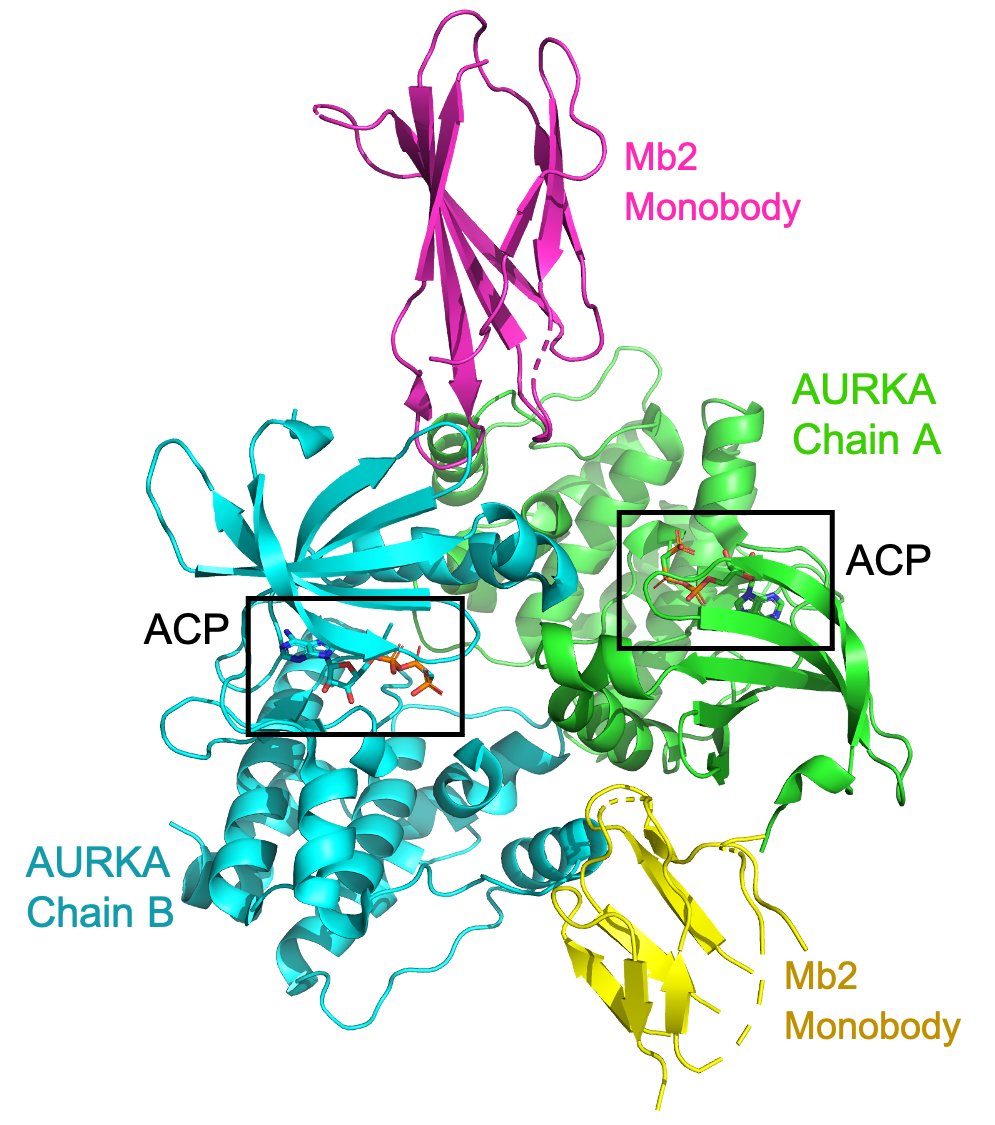

In [21]:
Image("./figures/6c83_complex.png", width=400)

In [22]:
# merge protein and docked ligand
docked_lig_file = "data/docked_2c6e_ACP_pH74_netcharge1.pdb"
protein_file = "data/aurka_protein_2c6e.pdb"
crystal_file = "data/6c83.pdb"

merge_prot_lig_pdbs(protein_file, docked_lig_file)


In [23]:
# extract the coordinated of the ligand from the crystal structure
extract_lig_from_aligned_crystal(crystal_file, "complex.pdb", max_dist = 7)


The crystal structure data/6c83.pdb contains 4 chains and 1 ligands ['ACP']

ACP
The coordinates of ACP extracted from the crystal structure and chain A are stored in data/ACP_crystal_aligned_1.pdb
The coordinates of ACP extracted from the crystal structure and chain B are stored in data/ACP_crystal_aligned_2.pdb


In [24]:
# Calculate RMSD for ACP extracted from chain A:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile(docked_lig_file)
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/ACP_crystal_aligned_1.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/ACP_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")


RMSD: 3.82


In [25]:
# Calculate RMSD for ACP extracted from chain B:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile(docked_lig_file)
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/ACP_crystal_aligned_2.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/ACP_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")



RMSD: 3.02


#### Example where the crystal structure contains different ligands

The PDB structure 5DPV of AURKA contains two different ligands, 5DN and SKE. Tthe figure below shows that SKE (blue) is located in the binding pocket while 5DN (orange) lies on the surface of the protein. 

It occurs very often that a crystal structure contains different ligands or multiple copies of the same ligand. It is important to extract only the coordinates of the ligand located in the binding pocket, corresponding to the ligand of interest.

The function described above checks the location of the ligand before extracting the coordinates. And this is achived by measuring the distance between the center of mass of the ligand in the docked structure (assuming that it is located in the binding pocket) and that of the ligand in the crystal structure. 


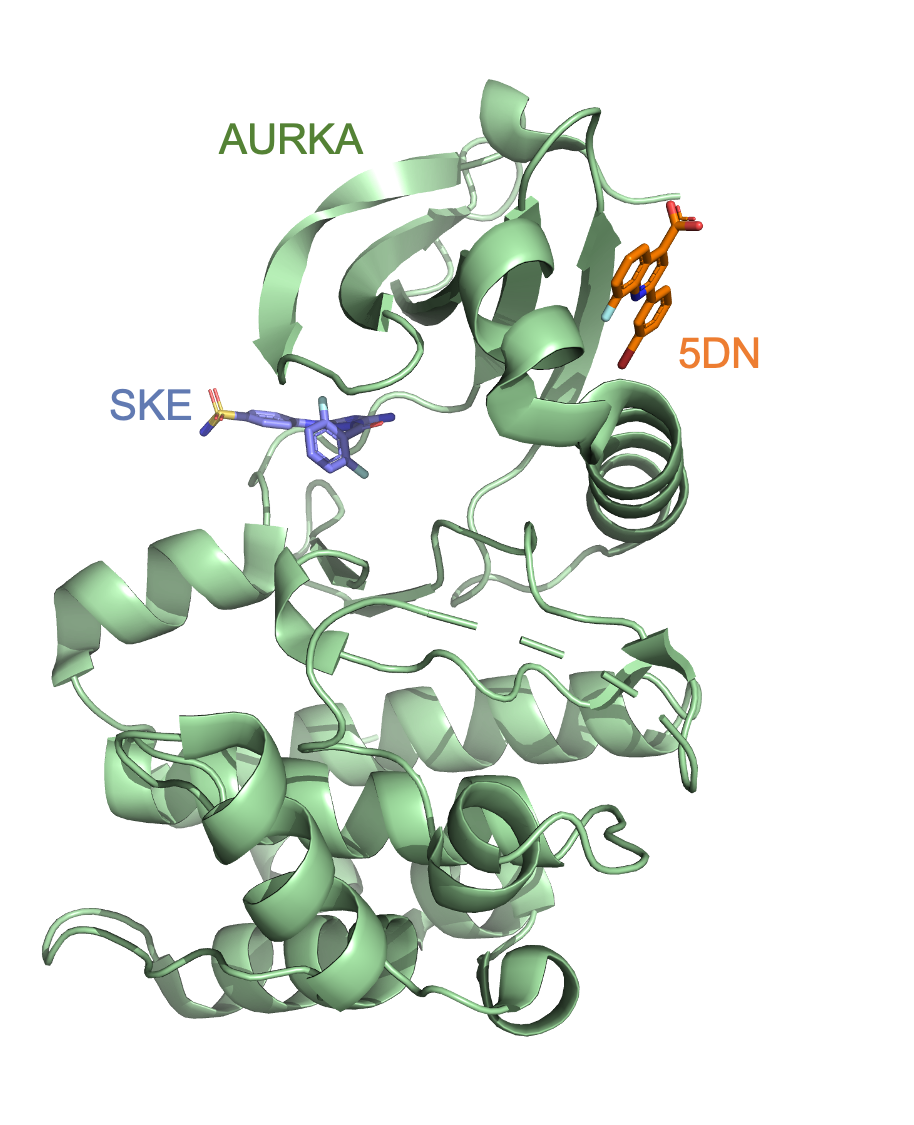

In [26]:
Image("./figures/5dpv_complex.png", width=300)

In [27]:
docked_lig_file = "data/docked_2c6e_SKE_pH74_netcharge1.pdb"
protein_file = "data/aurka_protein_2c6e.pdb"
crystal_file = "data/5dpv.pdb"

merge_prot_lig_pdbs(protein_file, docked_lig_file)

In [28]:
extract_lig_from_aligned_crystal(crystal_file, "complex.pdb", max_dist = 7)

The crystal structure data/5dpv.pdb contains 1 chains and 2 ligands ['SKE', '5DN']

SKE
The coordinates of SKE extracted from the crystal structure and chain A are stored in data/SKE_crystal_aligned_1.pdb

5DN
PDB data/5dpv.pdb cmpd 5DN res 401 is out of the binding pocket


In [29]:
# Calculare RMSD:
docked_ligand = Chem.rdmolfiles.MolFromPDBFile(docked_lig_file)
crystal_ligand = Chem.rdmolfiles.MolFromPDBFile("data/SKE_crystal_aligned_1.pdb")
rmsd2 = CalcLigRMSD(docked_ligand, crystal_ligand, rename_lig2 = True, output_filename = 'data/SKE_renamed.pdb')
print(f"RMSD: {rmsd2:.2f}")

RMSD: 8.17
